# 24.07.16 머신러닝 학습 5회차: 서포트 벡터 머신(SVM)

## 01 개념

### Support Vector Machine: 거리 기반 알고리즘

- 전통적인 이진 분류를 위한 기법 중 하나로, N차원을 공간을 (N-1)차원으로 나눌 수 있는 초평면을 찾는 분류 기법이다.

- 마진이 최대화 되는 결정 경계를 찾는 방법이다.

- 마진이란 클래스를 구분하는 초평면(결정 경계)과 초평면에서 가장 가까운 훈련 샘플 사이의 거리이다.

- 값이 커질수록 분류가 명확하게 잘 되기 때문에 최대한 큰값을 갖는 게 좋다.

- 서포트 벡터란 초평면에서 가장 가까운 훈련 샘플이다.

- 이 모델은 feature의 scale에 민감하기 때문에 **scale을 조정**해주면 결정 경계가 좋아진다.

### 선형SVM

- 사이킷런의 하이퍼파라미터: 하드 마진 분류, 소프트 마진 분류

- 하드 마진은 모든 샘플이 마진 바깥 쪽에 올바르게 분류가 되어야 한다. 모델이 과적합되기 쉽고 이상치에 민감하다.

- 소프트 마진은 모델 규제를 적용한 방법, 일부 샘플을 무시하고 마진을 설정한다. 유연함, C=1부터.

### 비선형SVM

- 선형 분리가 불가능한 공간 (예를 들어, 1차원)을 잠깐 고차원 특성공간 (2차원)으로 보내 선형분리를 진행하고 다시 기존 입력공간으로 변환하는 기법이다.

- 입력공간 변환을 위해 mapping function을 사용한다.

- but 계산량을 줄이기 위해 커널트릭이 나왔다. 이는 실제로는 데이터의 특성을 확장하지 않지만 마치 확장한 것처럼 만들어 계산하는 방식이다.

- 고차원의 복잡한 계산 없이 커널 함수를 사용하여 연산량을 간단하게 해결한다. 커널함수의 종류는 기본적으로 linear를 사용한다.

### 커널 함수

- 가장 성능이 좋고 많이 사용되는 것은 가우시안 RBF(radial basis function)이며, 이 함수는 입력공간을 무한대의 특성공간으로 보내는 방식이다.

- RBF에서는 기본 C만이 아닌 Gamma라는 파라미터를 가지게 된다.  Gamma는 하나의 데이터의 영향력을 정하는 파라미터이다.

- Gamma가 커질수록 결정경계의 곡률이 커지며 과대적합이 위험이 있고, Gamma가 작아지면 결정경계의 곡률이 작아지고 과소적합이 위험이 있다.

- 실제로 사용할 때는 커널함수와 소프트마진을 같이 사용하는 경우가 많다.

### SVM의 장점

1. 고차원 데이터에서 효과적임: 데이터의 차원이 샘플 수보다 많을 때 SVM은 매우 효과적이다.

2. 과적합 방지: 정규화(스케일링)를 사용하여 과적합을 방지한다.

3. 명확한 경계가 있는 경우 뛰어남: 클래스 간에 명확한 경계가 있을 때 성능이 우수하다.

4. 다양한 커널 함수 지원: 선형, 다항식, RBF 등 다양한 커널 함수를 사용할 수 있어 다양한 데이터 유형에 적응할 수 있다.

5. 소규모 데이터셋에서 잘 작동함: SVM은 특징 수가 관측 수보다 많은 소규모 데이터셋에서 효율적으로 작동한다.

## 02 코드 실습(1)

In [2]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC    # 분류 모델
from sklearn.svm import SVR    # 회귀 모델

In [3]:
# 데이터 가져오기
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [5]:
df['species'] = df['species'].astype('category').cat.codes

.astype('category'): 범주형 데이터 타입으로 변환. 데이터를 범주형으로 취급하여 메모리를 절약한다.

.cat.codes: 범주형 데이터의 각 고유한 값을 정수 코드로 변환한다.

In [6]:
# 데이터 분할하기
  # 시각화를 위해 특성은 2개만 사용 (petal length, petal width)
  # 범주가 Virginica 인지 아닌지 이진 분류로 변경
X = df.loc[:, ['petal_length', 'petal_width']]
Y = df.loc[:, 'species'] == 2
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
Y # 범주형(0/1) > 분류 모델 사용

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [9]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [10]:
# SVM은 스케일에 민감 > 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [11]:
# 학습 데이터에서 학습한 통계적 특성을 그대로 적용하여 공정한 모델 평가를 목적으로 함.
x_test = scaler.transform(x_test)

In [12]:
# 선형 SVM 모델 생성 및 학습
from sklearn.svm import LinearSVC
model = LinearSVC(C=1, random_state=42)  # C가 클 수록 과적합. (모든 샘플을 올바르게 분류하려고 함.)
model.fit(x_train, y_train)

C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, random_state=42)

In [14]:
# 모델 예측값
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True])

In [15]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9553571428571429
평가 데이터 성능 : 0.9736842105263158


In [16]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        29
        True       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



### False

- Precision(정밀도): 1.00 (모델이 클래스 F로 예측한 샘플 중 100%가 실제로 클래스 F임)

- Recall(재현율): 0.97 (실제 클래스 F 샘플 중 97%를 모델이 정확히 예측함)

- F1-score: 0.98 (Precision과 Recall의 조화 평균)

- Support: 29 (실제 클래스 F 샘플의 수)

### Overall

- Accuracy: 0.97 (전체 샘플 중 97%를 모델이 정확히 예측함)

- Macro avg: 각 클래스의 메트릭의 단순 평균

- Weighted avg: 각 클래스의 샘플 수를 가중치로 한 평균

## 03 코드 실습(2)

### 감정 분석: 서포트 벡터 머신

In [18]:
# 환경 설정
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [117]:
# 데이터 불러오기
data = pd.read_csv('./dataset/Tweets.csv')

### 데이터 살펴보기

In [20]:
data.shape

(14640, 15)

In [21]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [22]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [23]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### 메타 데이터

tweet_id: 트윗의 고유 식별자(ID)

airline_sentiment: 트윗의 감정 분석 결과. 주로 긍정적, 중립적, 부정적 등의 분류로 나타날 수 있다.

airline_sentiment_confidence: 감정 분석 결과에 대한 신뢰도. 해당 감정 분류가 얼마나 신뢰할 수 있는지를 나타내는 값.

negativereason: 부정적인 감정일 경우, 그 이유. 예를 들어, 서비스 불만, 지연, 취소 등 부정적인 감정의 구체적인 이유를 나타낸다.

negativereason_confidence: 부정적인 이유에 대한 신뢰도. 해당 이유가 얼마나 신뢰할 수 있는지를 나타내는 값.

airline: 트윗이 언급한 항공사의 이름.

airline_sentiment_gold: 골드 표준 감정 레이블. 데이터셋에서 이 값이 제공된다면, 이는 사람이 직접 라벨링한 감정 분석 결과일 가능성이 높다.

name: 트윗 작성자의 이름.

negativereason_gold: 골드 표준 부정적 이유 레이블. 사람이 직접 라벨링한 부정적인 이유.

retweet_count: 리트윗 횟수.

text: 트윗의 본문. 트위터 사용자가 작성한 실제 텍스트 내용.

tweet_coord: 트윗 작성 시의 좌표 정보. 트윗이 작성된 위치를 나타내는 경도와 위도 정보.

tweet_created: 트윗 작성 시각. 트윗이 작성된 날짜와 시간.

tweet_location: 트윗 작성자의 위치. 사용자가 트위터 프로필에 입력한 위치 정보.

user_timezone: 트윗 작성자의 시간대. 사용자가 설정한 시간대 정보.

In [109]:
# 중복 데이터를 제외하고 value값이 몇 개가 있는가?
data.nunique()

tweet_id                        11425
airline_sentiment                   2
airline_sentiment_confidence      857
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             6431
retweet_count                      16
text                            11381
tweet_created                       9
tweet_location                   2559
user_timezone                      77
airline_sentiment_encoded           2
clean_tweet                     11286
dtype: int64

In [26]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### 데이터 전처리

In [118]:
# 전처리 전
data['tweet_created'][:3]

0    2015-02-24 11:35:52 -0800
1    2015-02-24 11:15:59 -0800
2    2015-02-24 11:15:48 -0800
Name: tweet_created, dtype: object

In [121]:
# 1번 날짜만 추출
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [124]:
# 2번 datetime형식으로 변환
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [120]:
# 2번 코드만 적용했을 때
data['tweet_created'][:3]

0   2015-02-24 11:35:52-08:00
1   2015-02-24 11:15:59-08:00
2   2015-02-24 11:15:48-08:00
Name: tweet_created, dtype: datetime64[ns, UTC-08:00]

In [125]:
# 둘 다 적용해야 데이터 형식도 바뀐다.
data['tweet_created'][:3]

0   2015-02-24
1   2015-02-24
2   2015-02-24
Name: tweet_created, dtype: datetime64[ns]

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [127]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [128]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [129]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [130]:
data['tweet_created'].nunique()

9

In [136]:
# size()로 행의 수를 counting한다.
numberoftweets = data.groupby('tweet_created').size()

In [137]:
numberoftweets.dtype

dtype('int64')

In [138]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

### 널값 처리

In [139]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [144]:
print("Percentage null or na values in df")
# 불필요한 중복코드로 아래 코드로 바꿈.
# ((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)
(data.isnull().sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [145]:
# 결측치 90% 비중 이상 삭제
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [149]:
(data.isnull().sum() * 100 / data.index.size).round(2) # 삭제 됐죠?

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
name                             0.00
retweet_count                    0.00
text                             0.00
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [146]:
freq = data.groupby('negativereason').size()

In [150]:
# 부정적인 리뷰 이유
freq.sort_values(ascending=False)

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
dtype: int64

### EDA

#### 1. Count of Type of Sentiment

In [153]:
data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

코드 1번: 원래 코드

Text(0.5, 1.0, 'Count of Type of Sentiment')

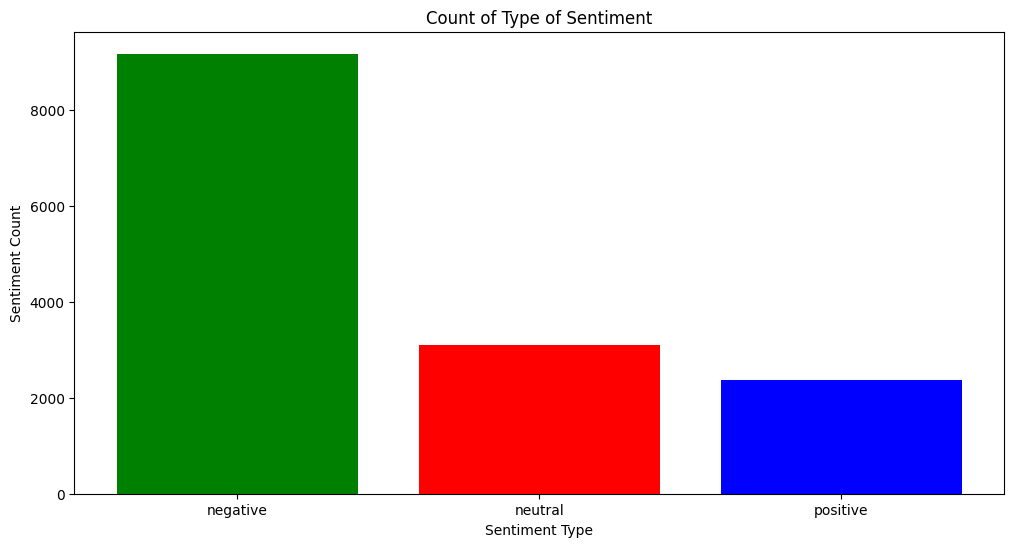

In [157]:
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)

plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

rotation=0: 눈금 레이블의 회전 각도를 지정한다. 0은 레이블이 수평으로 표시된다는 의미이다.

In [161]:
counter.index

Index(['negative', 'neutral', 'positive'], dtype='object', name='airline_sentiment')

In [162]:
counter.values

array([9178, 3099, 2363], dtype=int64)

코드 2번: figure함수 인수 생략, 인덱스 활용해서 직접 작성하지 않음. 위치를 지정하는 것보다 간단하다고 느껴진다.

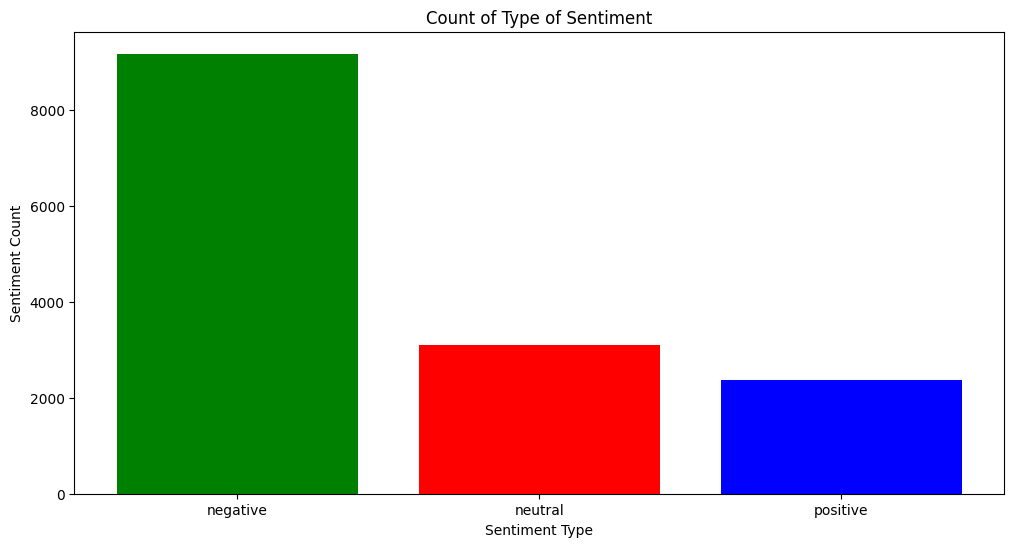

In [159]:
# 감정 유형별 개수 계산
counter = data.airline_sentiment.value_counts()

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(counter.index, counter.values, color=['green', 'red', 'blue'])

# x축 눈금 설정 및 레이블 추가
plt.xticks(counter.index, counter.index, rotation=0)

# x축, y축 라벨과 제목 설정
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

# 그래프 표시
plt.show()

#### 2. Count of Moods of 항공사

코드 1번: 원래 코드

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


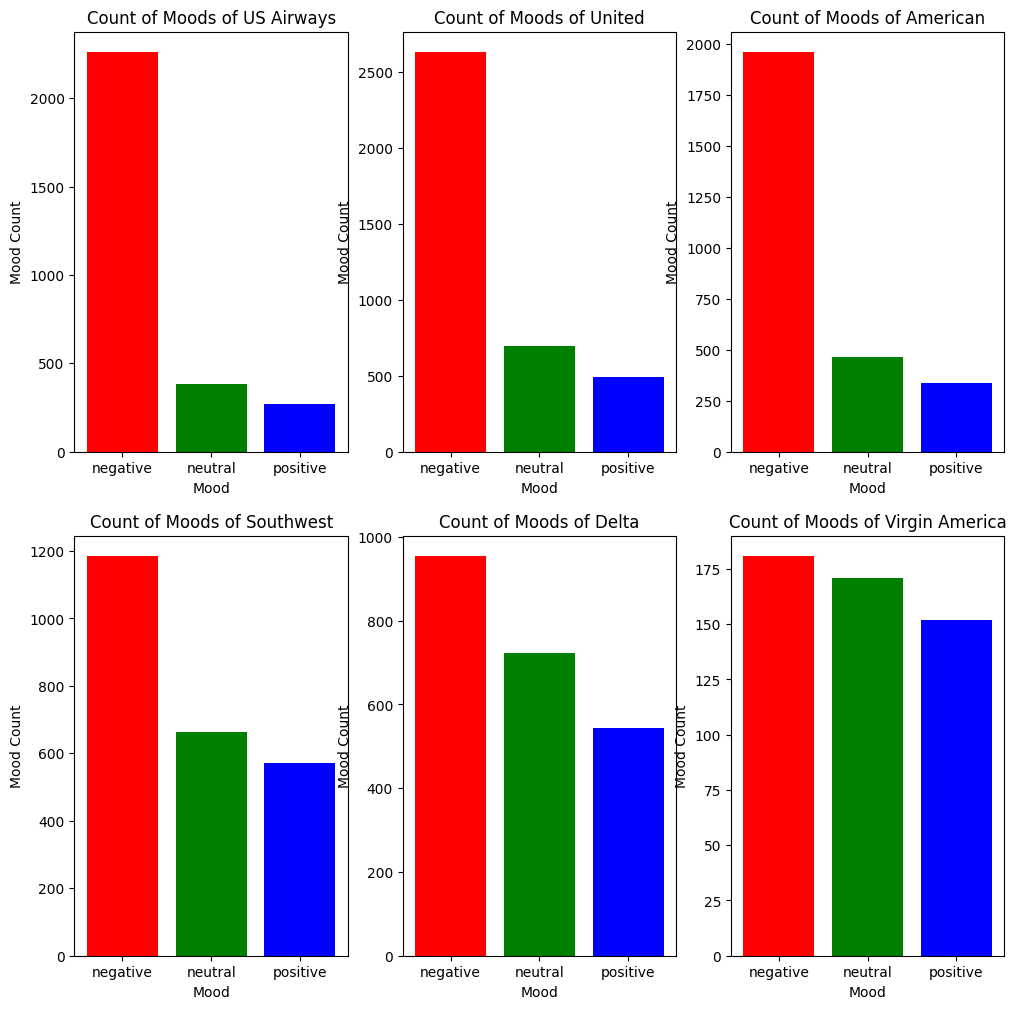

In [178]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data[data['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

코드 2번

In [191]:
# 항공사 고윳값
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [188]:
# 순차적으로 그래프 생성
for idx, airline in enumerate(airlines, 1):
    print(idx, airline)

1 Virgin America
2 United
3 Southwest
4 Delta
5 US Airways
6 American


In [199]:
data[data['airline'] == airline]['airline_sentiment'].value_counts()

airline_sentiment
negative    1960
neutral      463
positive     336
Name: count, dtype: int64

In [200]:
# 정렬을 위해 적어준다. 순서를 바꾸면 알아서 값이 알맞게 바뀐다.
sentiment_counts.reindex(['negative', 'positive', 'neutral'], fill_value=0)

airline_sentiment
negative    1960
positive     336
neutral      463
Name: count, dtype: int64

for idx, airline in enumerate(airlines, 1): 1은 enumerate 함수의 두 번째 인자로, 인덱스의 시작 값을 지정한다.

plt.subplot(2, 3, idx): 현재 그림을 2행 3열의 그리드로 나누고, idx번째 서브플롯을 활성화한다.

Total number of tweets for each airline 
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


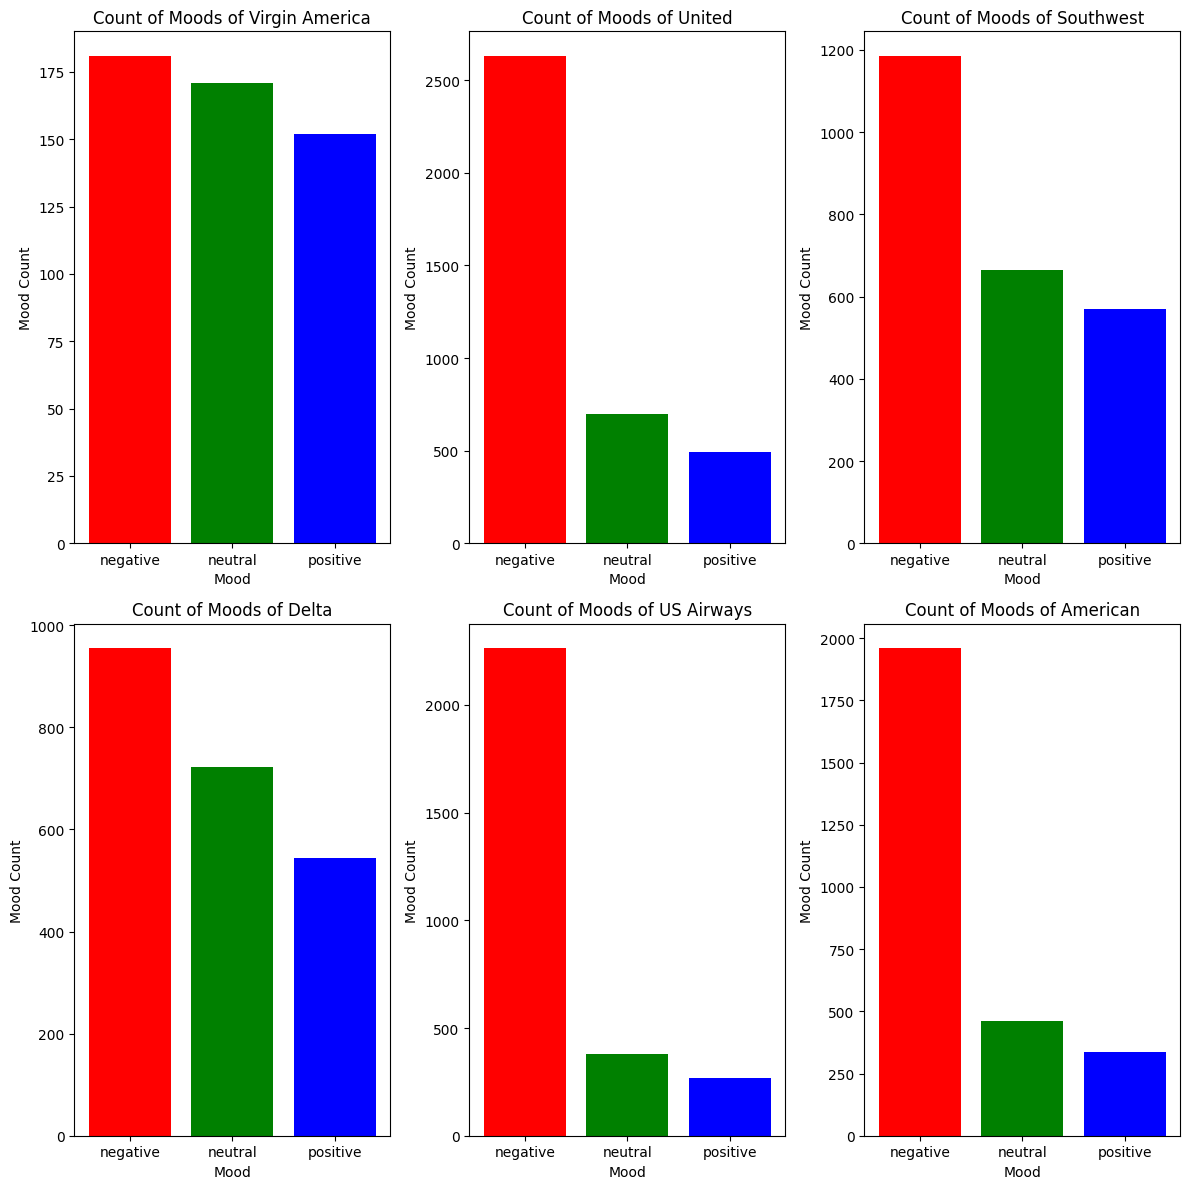

In [205]:
# 항공사별 트윗 개수 출력
print("Total number of tweets for each airline \n", data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

# 고유한 항공사 목록 생성
airlines = data['airline'].unique()

# 시각화
plt.figure(figsize=(12, 12))

# 항공사별 감정 분포 그래프 생성
for idx, airline in enumerate(airlines, 1): # 1은 뭐지? 1은 enumerate 함수의 두 번째 인자로, 인덱스의 시작 값을 지정한다.
    plt.subplot(2, 3, idx) # 현재 그림을 2행 3열의 그리드로 나누고, idx번째 서브플롯을 활성화한다.
    sentiment_counts = data[data['airline'] == airline]['airline_sentiment'].value_counts()
    sentiment_counts = sentiment_counts.reindex(['negative', 'neutral', 'positive'], fill_value=0) # 정렬하고, 누락된 값은 0으로 채운다.

    plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'blue']) # x값, x축, 컬러
    plt.xticks(rotation=0)
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title(f'Count of Moods of {airline}')

# 서브플롯 간의 간격을 자동으로 조정한다.
plt.tight_layout()
plt.show()

#### 3. Negative Tweet Percentages by Airline

코드 1번: 원래 코드

In [ ]:
neg_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

코드 2번: 직접 작성 대체하기, unstack 활용

In [236]:
# 각 항공사의 감정별 트윗 개수 계산
data.groupby(['airline', 'airline_sentiment']).size()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64

In [235]:
data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [237]:
data['airline'].value_counts() # 항공사별 데이터 수집 개수

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [239]:
# 부정적인 트윗의 비율 계산. sort_index를 사용하여 항공사 이름 순으로 정렬한다.
(sentiment_counts['negative'] / total_tweets).sort_index()

airline
American          0.710402
Delta             0.429793
Southwest         0.490083
US Airways        0.776862
United            0.688906
Virgin America    0.359127
dtype: float64

DataFrame.plot 메서드는 데이터프레임을 바로 사용하여 그래프를 그릴 수 있게 해준다. 둘의 차이는?

1. plt.bar는 리스트나 배열을 직접 사용하여 막대 그래프를 그린다.

2. plot 메서드는 데이터프레임을 사용하여 다양한 종류의 그래프를 그릴 수 있다.

In [240]:
perc.index

Index(['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin'], dtype='object')

In [261]:
perc.values

array([[0.71040232],
       [0.42979298],
       [0.49008264],
       [0.77686234],
       [0.68890633],
       [0.35912698]])

In [263]:
perc.values[:,0]

array([0.71040232, 0.42979298, 0.49008264, 0.77686234, 0.68890633,
       0.35912698])

In [251]:
perc.values.shape # 2차원이네 > 1차원 변경 필요

(6, 1)

                Percent Negative
airline                         
American                0.710402
Delta                   0.429793
Southwest               0.490083
US Airways              0.776862
United                  0.688906
Virgin America          0.359127


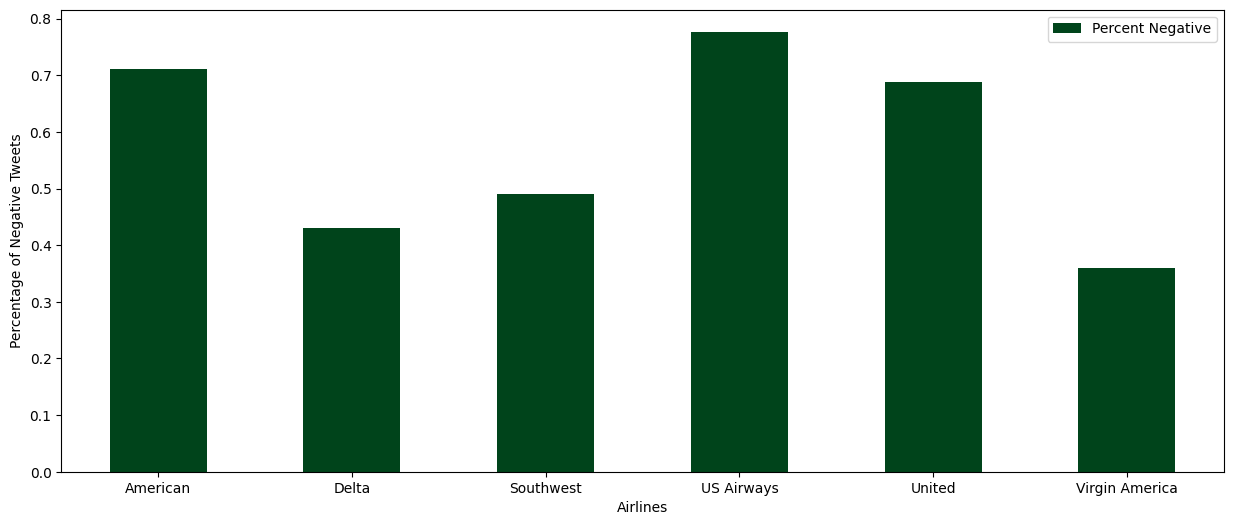

In [232]:
# 각 항공사의 감정별 트윗 개수 계산
    # unstack을 사용하여 감정별 트윗 개수를 열로 변환하고, fill_value=0을 사용하여 누락된 값을 0으로 채운다.
sentiment_counts = data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
total_tweets = data['airline'].value_counts()

# 부정적인 트윗의 비율 계산
negative_percentage = (sentiment_counts['negative'] / total_tweets).sort_index()

# 부정적인 트윗 비율 데이터프레임 생성
perc = negative_percentage.to_frame(name='Percent Negative')
print(perc)

# 데이터프레임을 바탕으로 막대 그래프 그리기
ax = perc.plot(kind='bar', rot=0, colormap='Greens_r', figsize=(15, 6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of Negative Tweets')
plt.show()

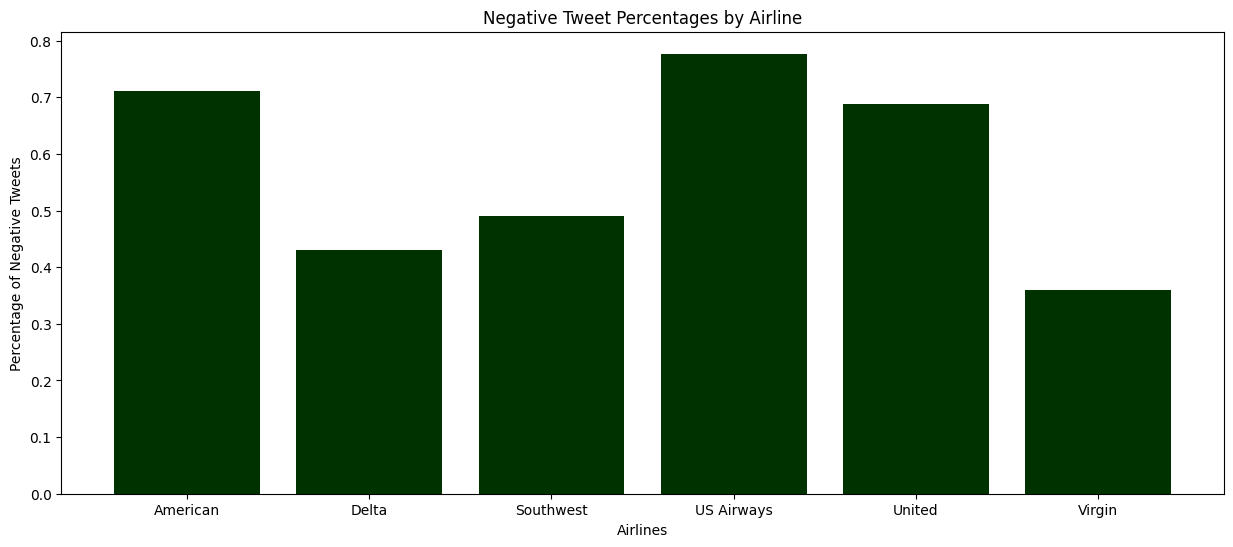

In [267]:
# 이거도 될까? 같은 방법이다. 근데 데이터 프레임이라 위의 방식이 더 간단하다.
plt.figure(figsize=(15, 6))
plt.bar(perc.index, perc.values.ravel(), color='#003200')
plt.xticks(rotation=0)
plt.xlabel('Airlines')
plt.ylabel('Percentage of Negative Tweets')
plt.title('Negative Tweet Percentages by Airline')
plt.show()

#### 4. 항공사별 감정지수 누적 막대그래프 - Tweets by Airline and Sentiment

.size(): 각 그룹의 크기를 계산한다.

In [269]:
data.groupby(['airline', 'airline_sentiment']).size()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64

.unstack(): 그룹화된 데이터를 피벗하여 'airline_sentiment'를 열로 만든다.

In [270]:
data.groupby(['airline', 'airline_sentiment']).size().unstack()

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


.plot: 데이터프레임을 kind 파라미터를 이용해 bar그래프로, stacked=True로 스택 막대 그래프를 만든다.

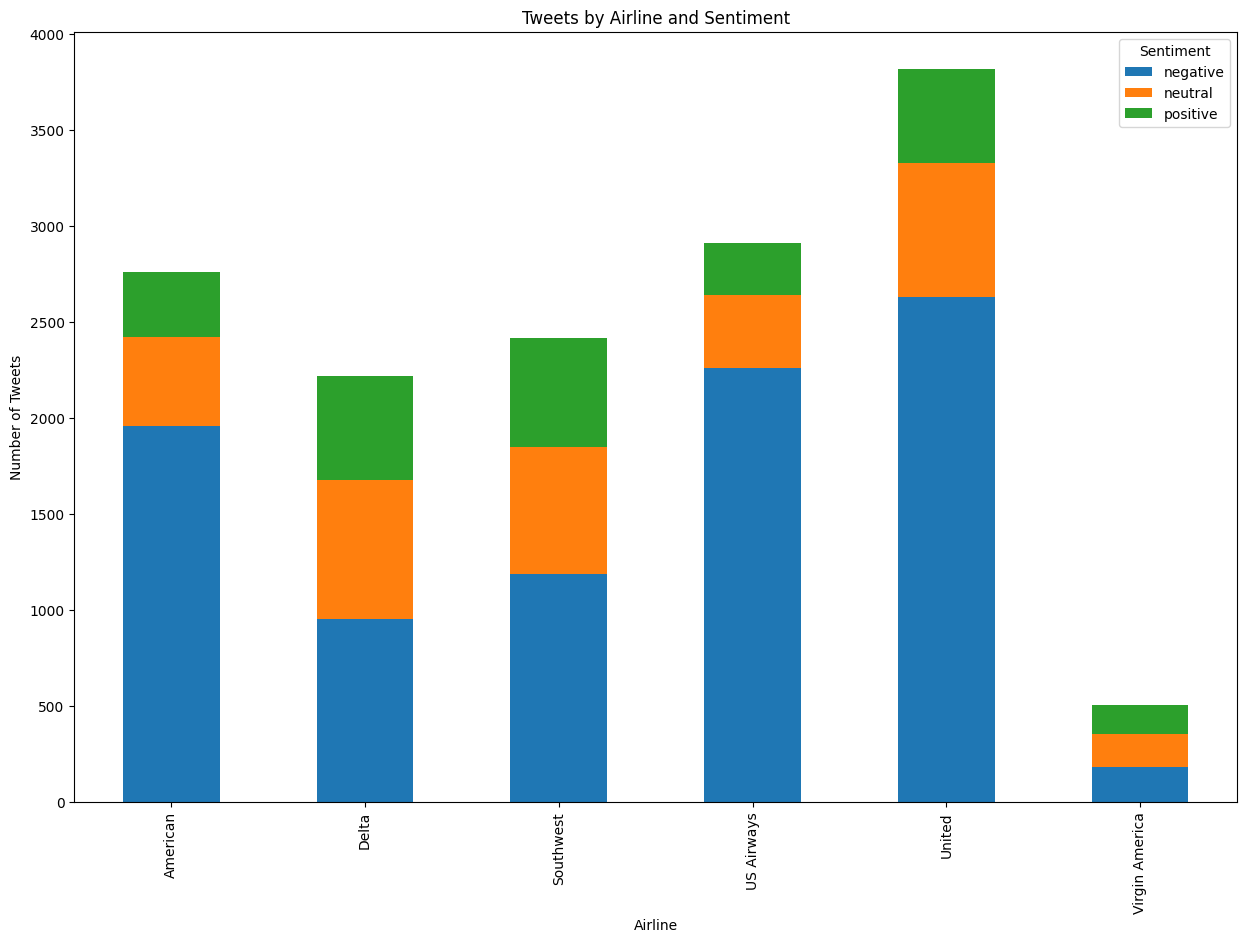

In [278]:
figure_2 = data.groupby(['airline', 'airline_sentiment']).size().unstack()
figure_2.plot(kind='bar', stacked=True, figsize=(15, 10))

# 재량으로 추가함.
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Airline and Sentiment')
plt.legend(title='Sentiment')
plt.show()

In [279]:
print(figure_2)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


#### 5. The Number of the Count of Negative Reasons for Airlines - 부정지수 이유 그래프화

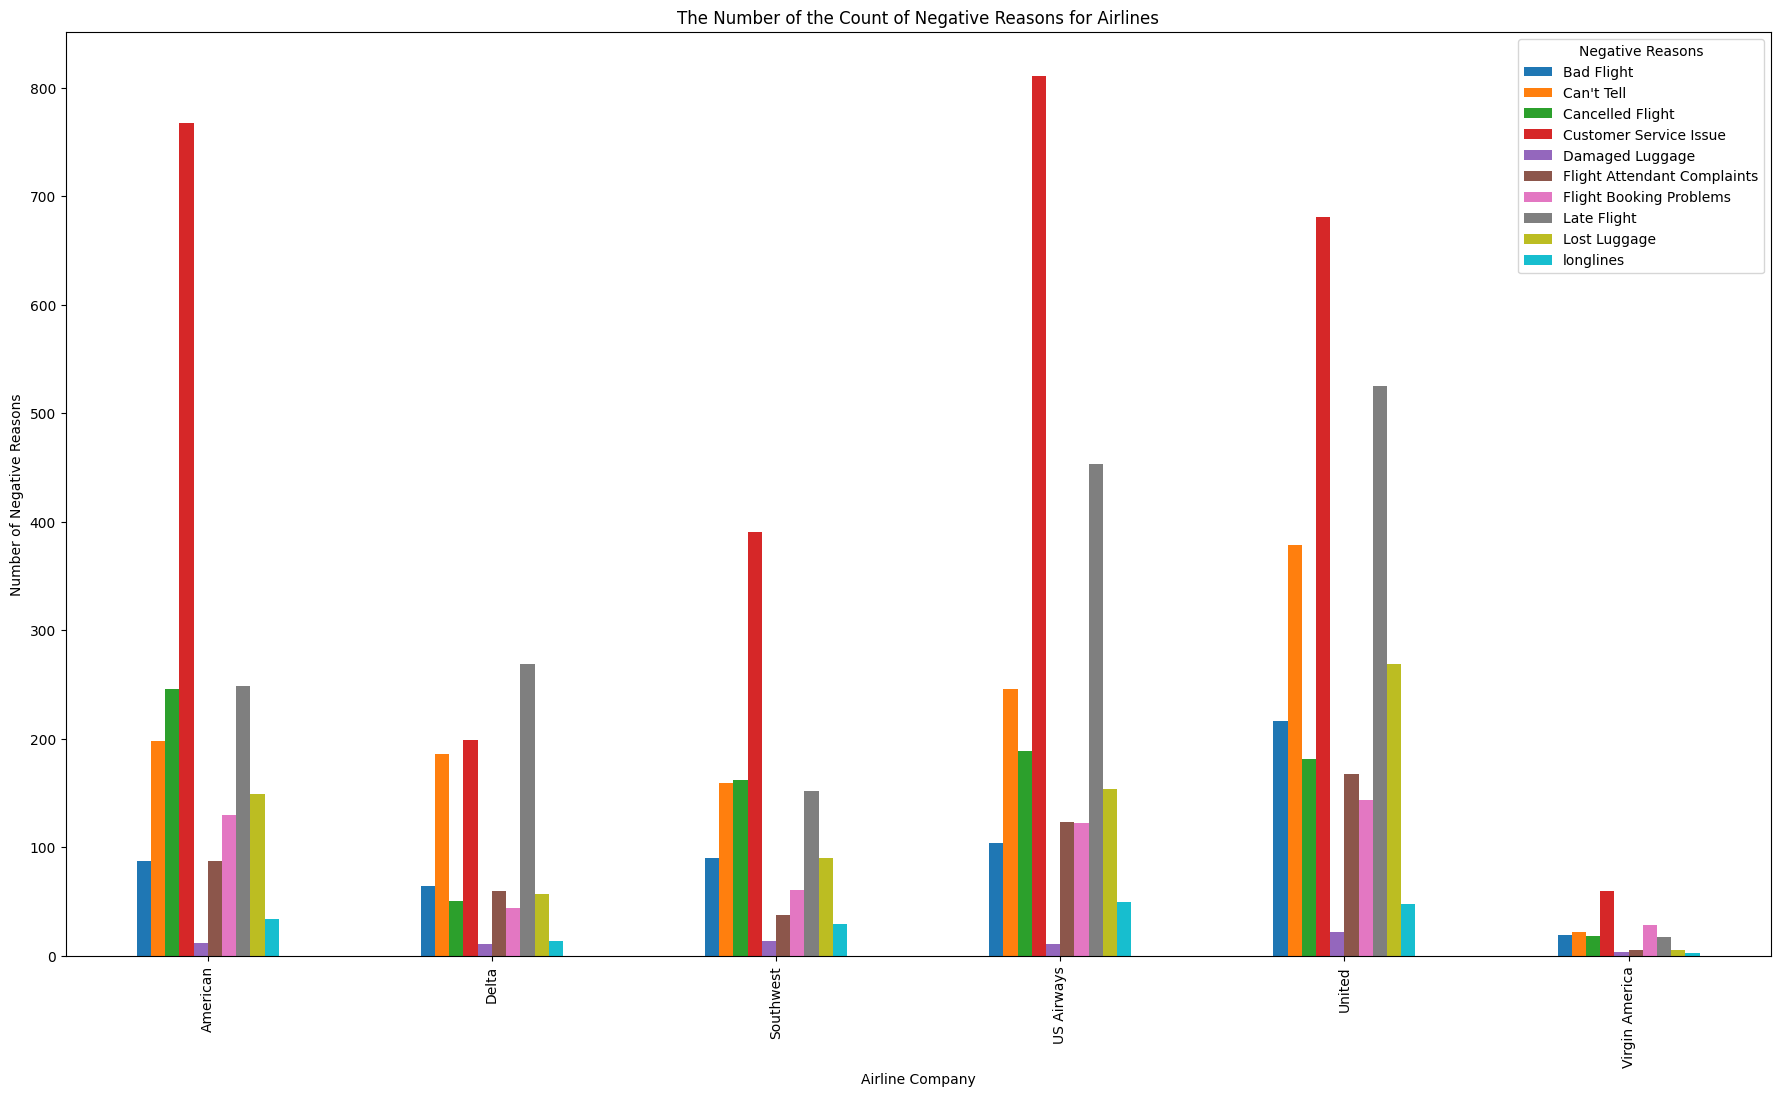

In [281]:
# 데이터 그룹화 및 부정적 이유의 빈도 계산
negative_reasons = data.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# 막대 그래프 그리기
negative_reasons.plot(kind='bar', figsize=(22, 12))

# 그래프 꾸미기
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative Reasons')
plt.title("The Number of the Count of Negative Reasons for Airlines")
plt.legend(title='Negative Reasons')
plt.show()

#### 6. 'Count of Reasons for '+Airline 여기까지

In [301]:
airlines = ['US Airways','United','American','Southwest','Delta','Virgin America']

In [308]:
airlines = data.airline.unique().tolist() # 위에서 바꾼 값이 있어서 다시 정정!

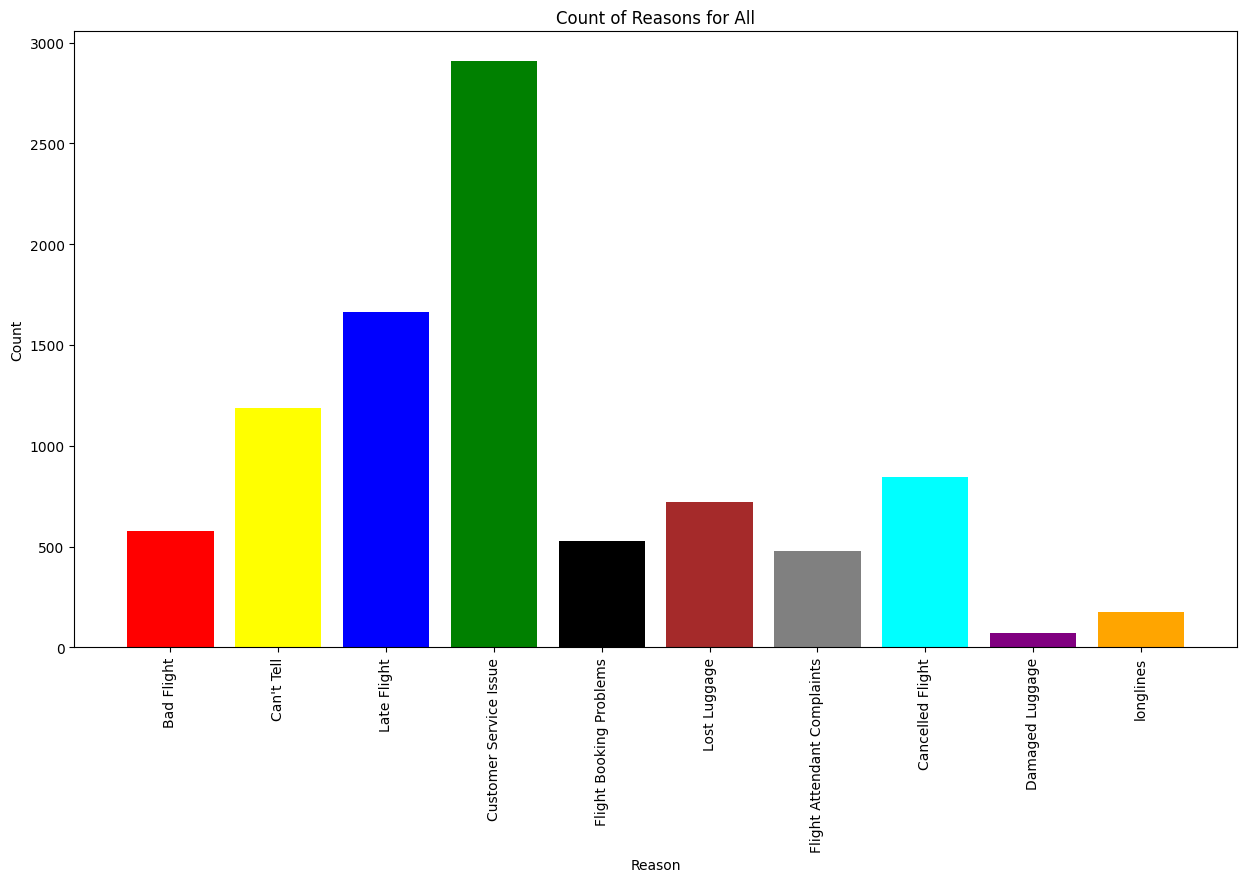

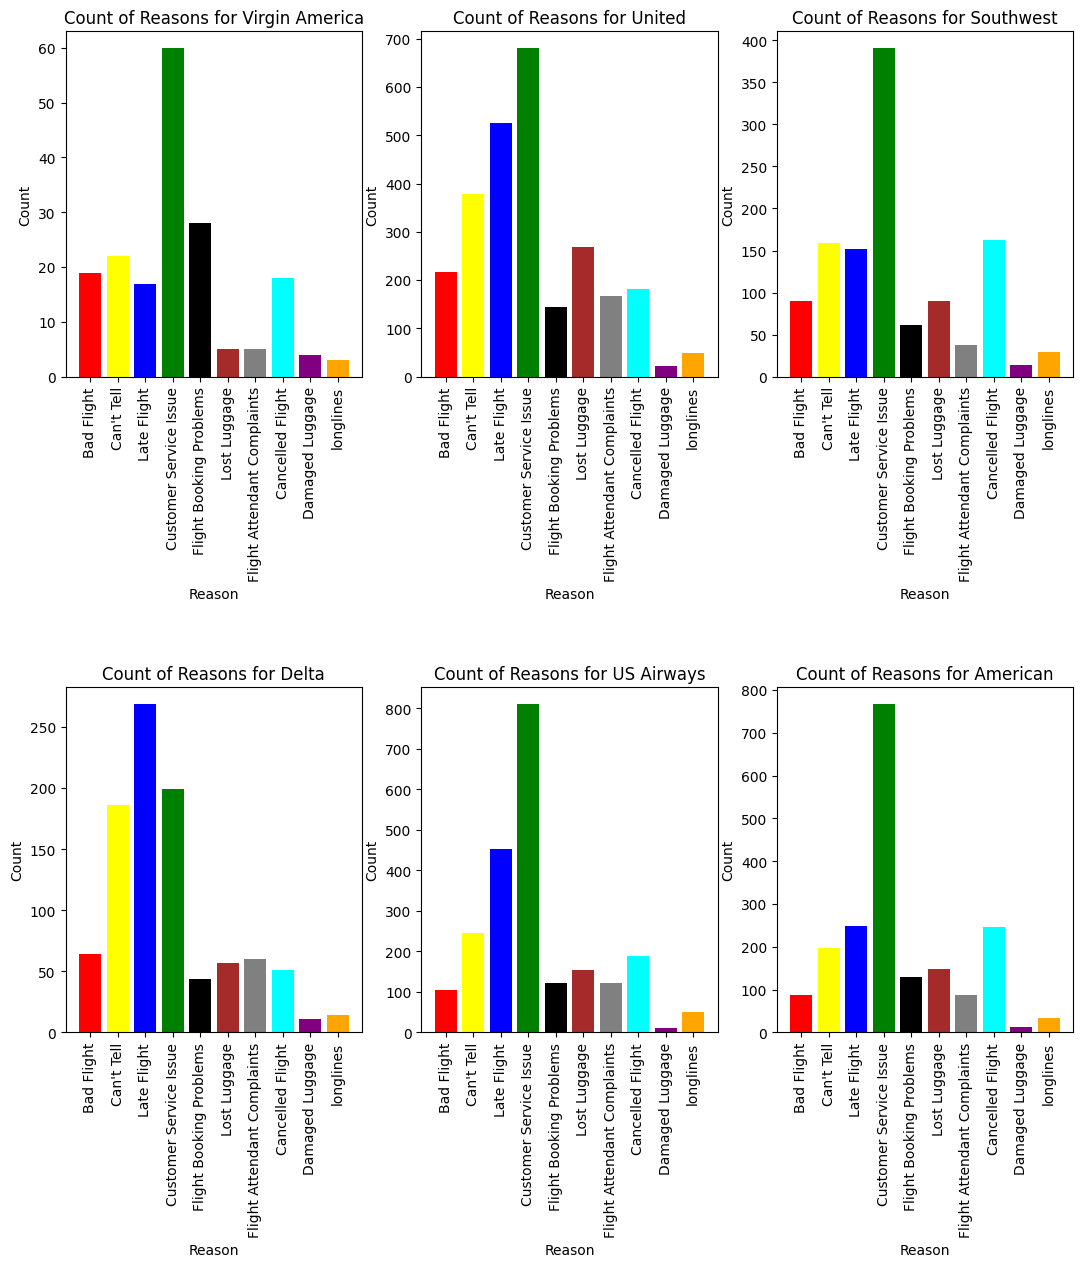

In [309]:
#get the number of negative reasons
data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [89]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

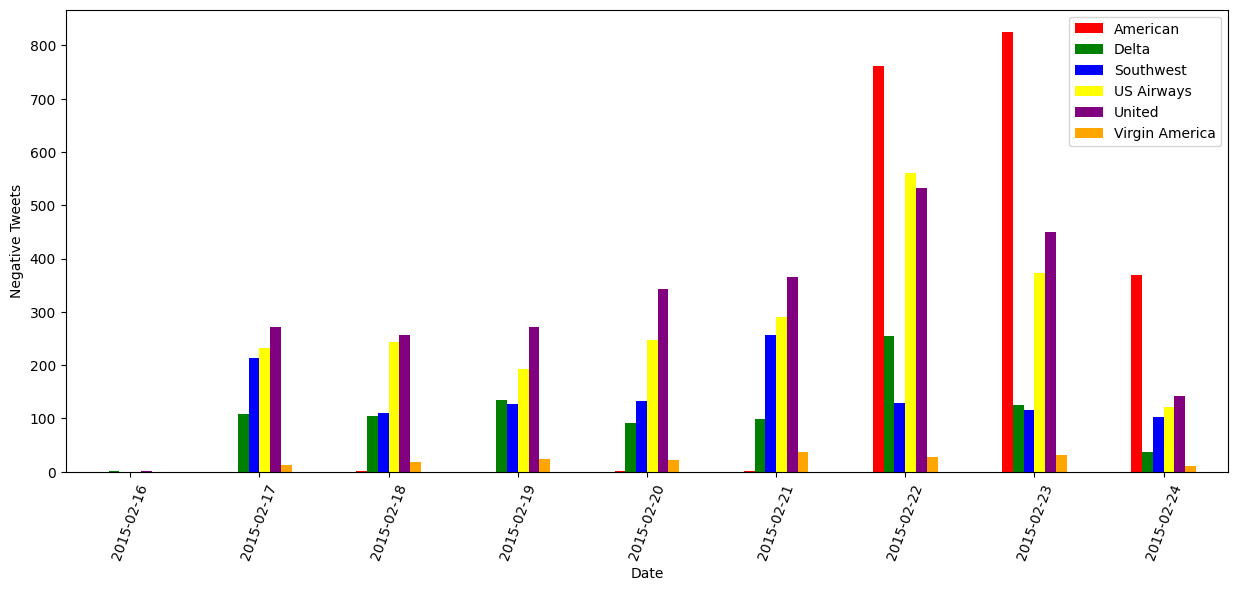

In [90]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

In [92]:
from wordcloud import WordCloud, STOPWORDS

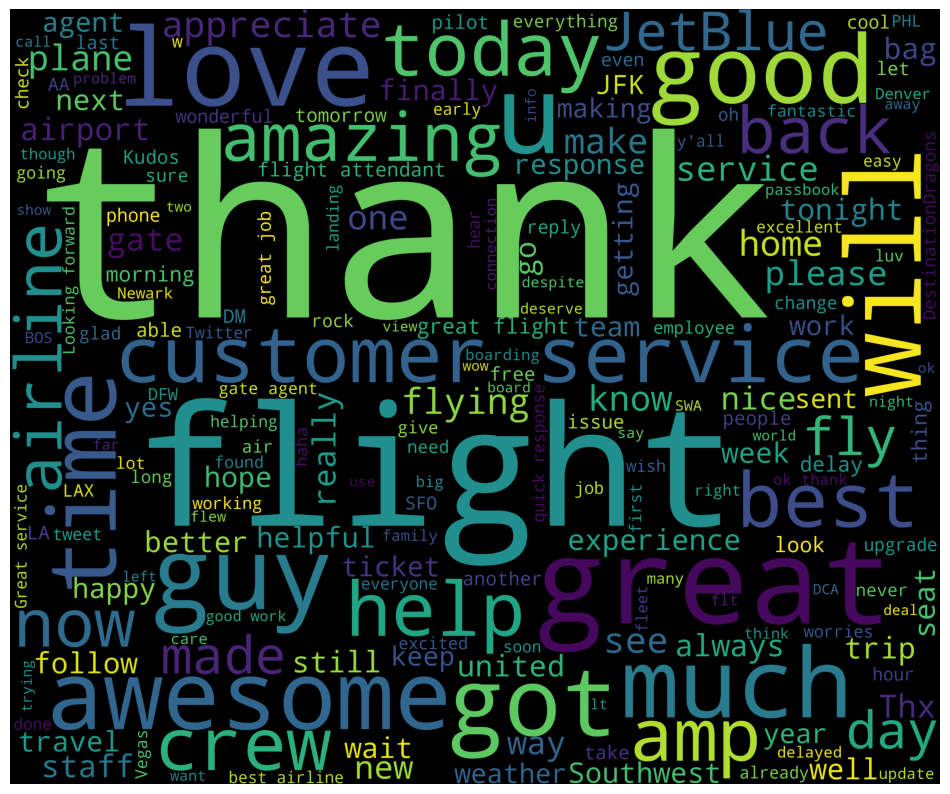

In [93]:
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

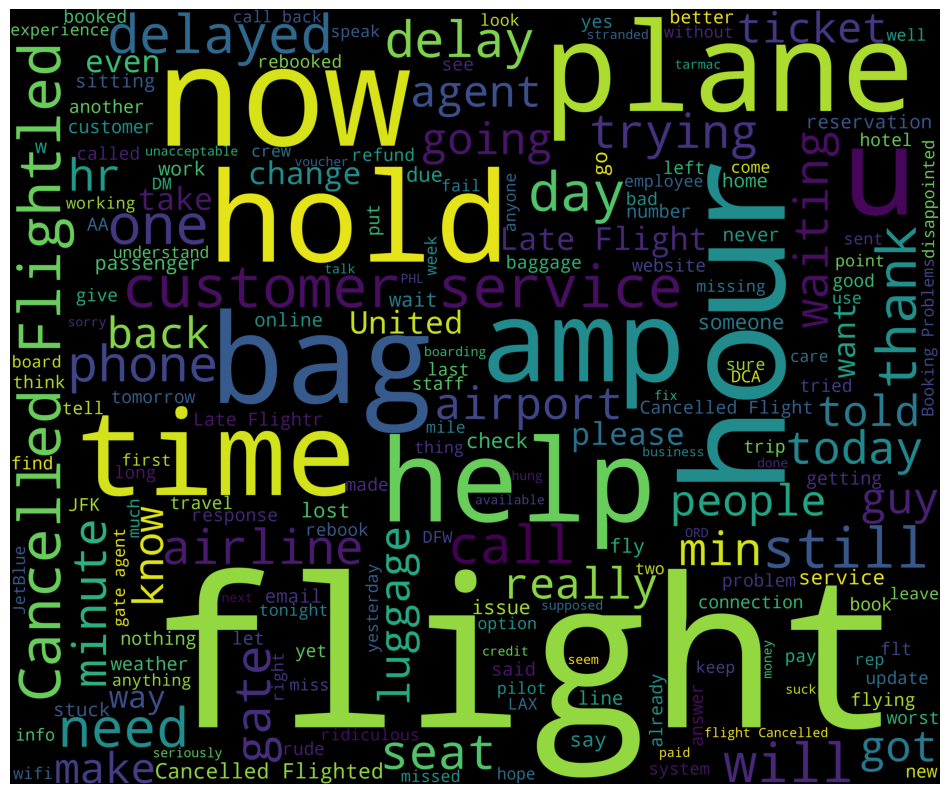

In [94]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [95]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


In [97]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [98]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### 벡터화

In [99]:
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

11541 11541


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [101]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [102]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [103]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

### 모델링

In [104]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [105]:
#accuracy score
accuracy_score(y_test,pred)

0.9081774081774082

In [106]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2194,  129],
       [ 136,  427]], dtype=int64)

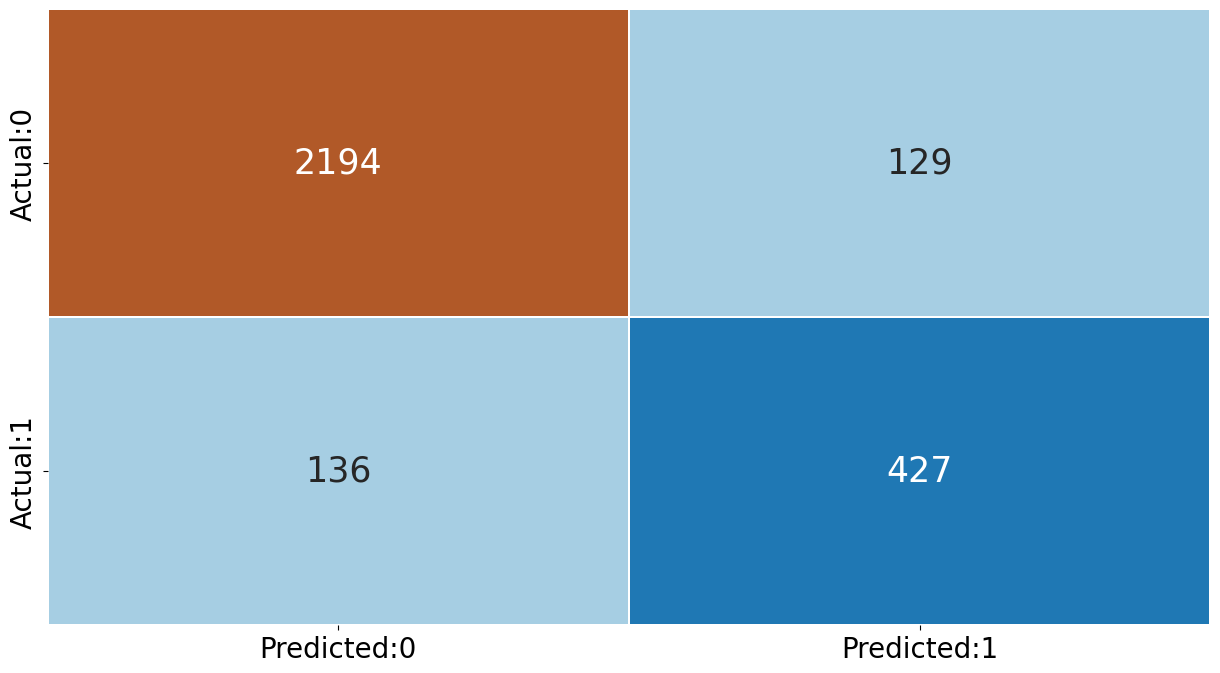

In [107]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886



## 04 참고 링크

https://www.kaggle.com/code/bansodesandeep/sentiment-analysis-support-vector-machine/notebook